# Workshop -1 Adding Sunglasses to Your Passport Photo Using OpenCV

## Name   : Sai Hrishi M
## Reg No : 212224240140

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1273, 976, 3)

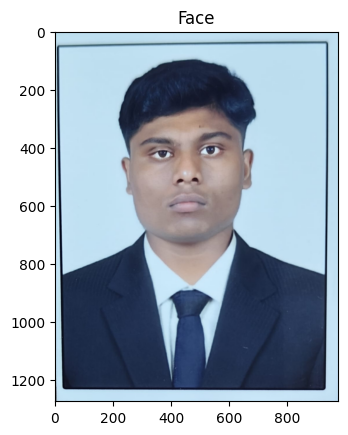

In [14]:
faceImage = cv2.imread(r"C:\Users\admin\Downloads\WhatsApp Image 2024-09-11 at 7.10.26 AM.jpeg")
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")
faceImage.shape

Text(0.5, 1.0, 'glassPNG')

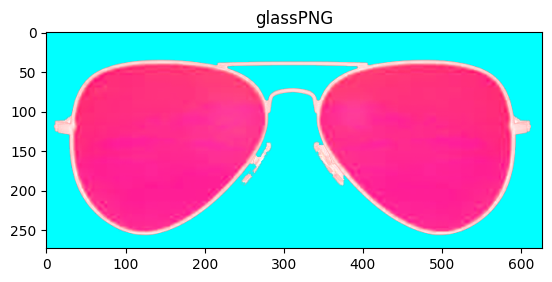

In [15]:
glassPNG = cv2.imread(r"C:\Users\admin\Downloads\sunglass-png-aviator-sunglass-png-pic-627.png",-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [16]:
glassPNG = cv2.resize(glassPNG,(340,100))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(100, 340, 4)


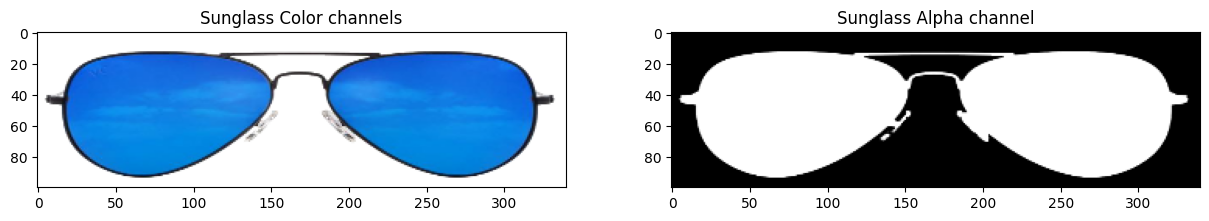

In [17]:
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

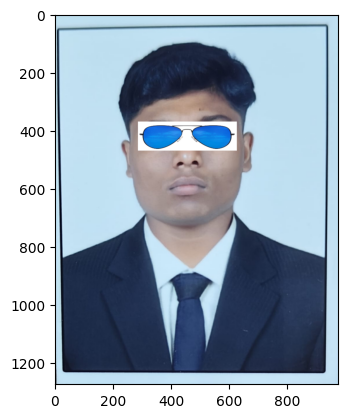

In [18]:
faceWithGlassesNaive = faceImage.copy()
faceWithGlassesNaive[370:470,285:625]=glassBGR
plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

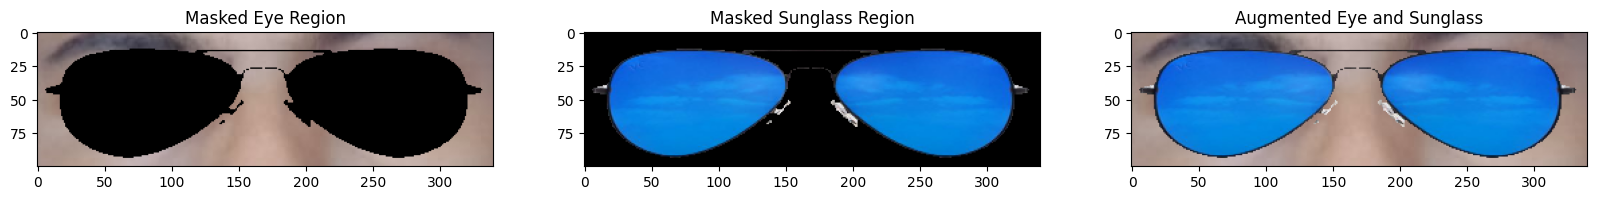

In [19]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))
glassMask = np.uint8(glassMask/255)
faceWithGlassesArithmetic = faceImage.copy()
eyeROI= faceWithGlassesArithmetic[370:470,285:625]
maskedEye = cv2.multiply(eyeROI,(1-  glassMask ))
maskedGlass = cv2.multiply(glassBGR,glassMask)
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

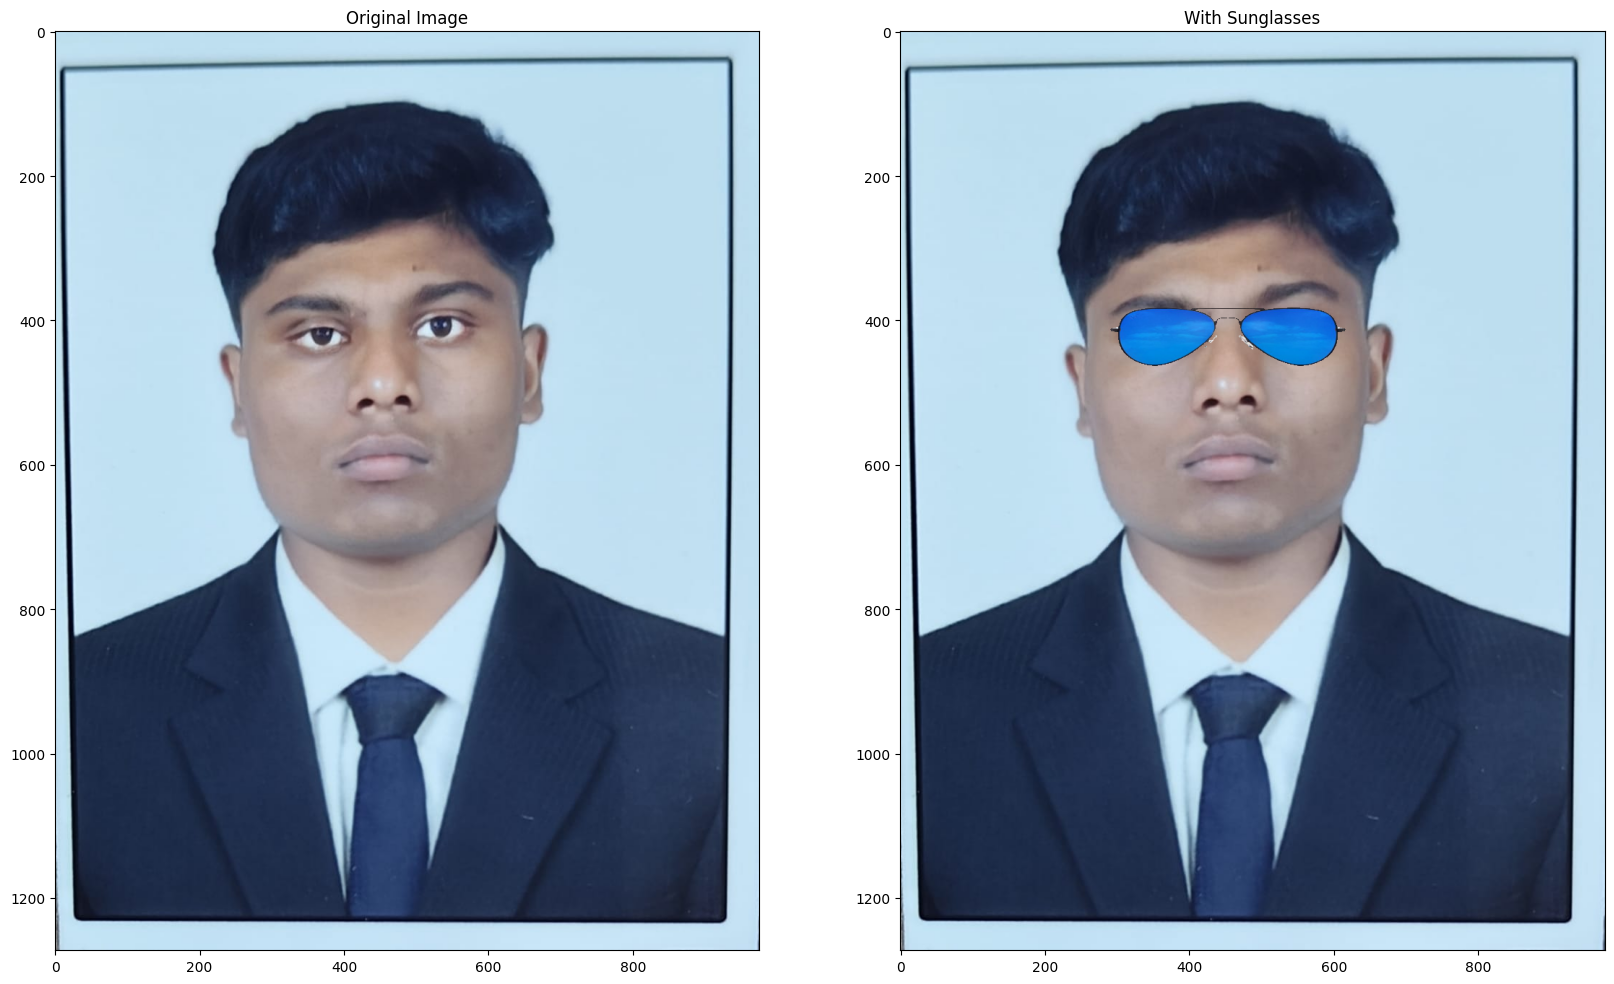

In [20]:
faceWithGlassesArithmetic[370:470,285:625]=eyeRoiFinal
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");